# Introduction to basic exploratory analysis

In [55]:
## first we import the necessary python libraries
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.basemap import Basemap
import colormaps as cmaps
from readCMIP5 import *

%pylab inline

matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

Populating the interactive namespace from numpy and matplotlib


<div class="alert alert-warning">
<h3>We begin by reading in the snow depth data, which has already been downloaded. The name of this variables is "snd".</h3>
</div>

In [20]:
lat, lon, snow_depth = readCMIP5Data("../data/SnowDepth_snd/", "gridded", "rcp45", "1", "snd")

<div class="alert alert-warning">
<h3>This data has two temperal dimensions (month and year) and two spatial dimensions (latitude and longitude). For now, suppose we are only interested in the average snow depth at each Arctic grid cell.</h3>
</div>

In [58]:
mean_snow_depth = snow_depth.mean(axis=0).mean(axis=0)
mean_snow_depth

masked_array(data =
 [[9.463486433233864e-06 2.9755116711231326e-06 5.970180689731016e-07 ...,
  9.962529804925552e-05 5.326815933828573e-05 2.503863463987129e-05]
 [1.117906738428295e-05 3.456179243682148e-06 6.903306967343956e-07 ...,
  0.00011977194233909203 6.388490594387276e-05 2.9608339036831817e-05]
 [1.1395533481087434e-05 3.4052752582337392e-06 5.934154838190839e-07 ...,
  0.00013045554132777899 6.825444207991356e-05 3.091246673831112e-05]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]],
             mask =
 [[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]],
       fill_value = 1e+20)

<div class="alert alert-warning">
<h3>Now let's put these data on a map</h3>
</div>

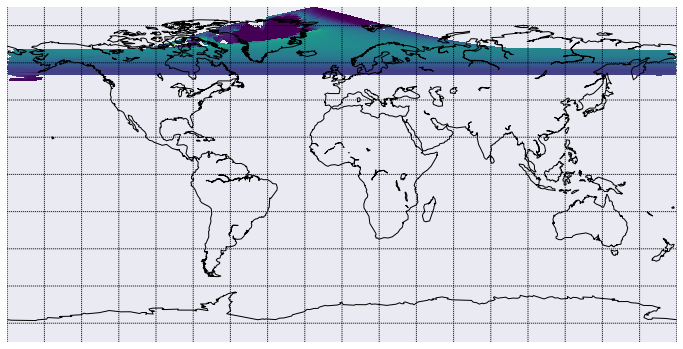

In [59]:
map = Basemap()

map.drawparallels(np.arange(-80.,81.,20.), )
map.drawmeridians(np.arange(-180.,181.,20.))
map.drawcoastlines()
x, y = map(lon, lat)
map.pcolormesh(x, y, mean_snow_depth, cmap=cmaps.viridis, latlon=True)

plt.show()

<div class="alert alert-warning">
<h3>This is not very useful! Let's make a map that better displays the Arctic.</h3>
</div>

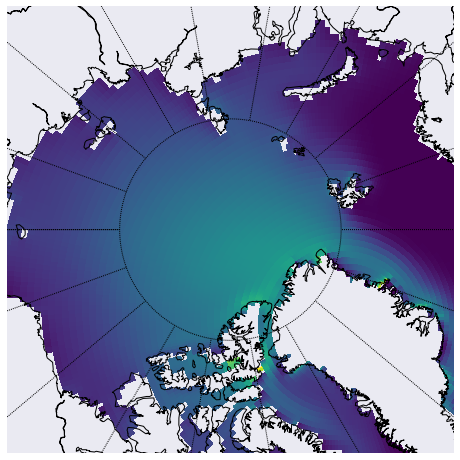

In [23]:
map = Basemap(projection='npstere',boundinglat=70,lon_0=270,resolution='l')

map.drawparallels(np.arange(-80.,81.,20.), )
map.drawmeridians(np.arange(-180.,181.,20.))
map.drawcoastlines()
x, y = map(lon, lat)
map.pcolormesh(x, y, mean_snow_depth, cmap=cmaps.viridis)

plt.show()

<div class="alert alert-warning">
<h3>Rather than looking at the average over time, we could also look at the variance.</h3>
</div>

In [60]:
var_snow_depth = snow_depth.var(axis=0).var(axis=0)

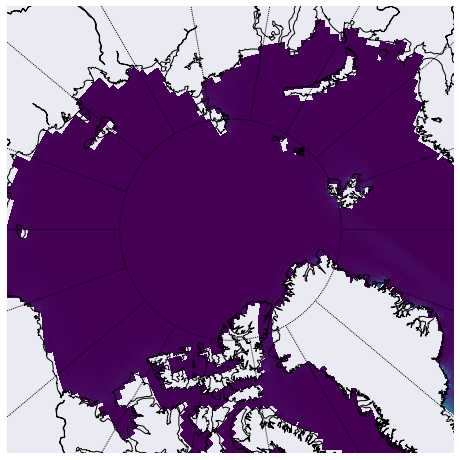

In [42]:
ax = matplotlib.pyplot.gca() 
map = Basemap(projection='npstere',boundinglat=70,lon_0=270,resolution='l')

map.drawparallels(np.arange(-80.,81.,20.), )
map.drawmeridians(np.arange(-180.,181.,20.))
map.drawcoastlines()
x, y = map(lon,lat)
map.pcolormesh(x, y, var_snow_depth, cmap=cmaps.viridis)

plt.show()

<div class="alert alert-warning">
<h3>There are also fancier-looking maps available.</h3>
</div>

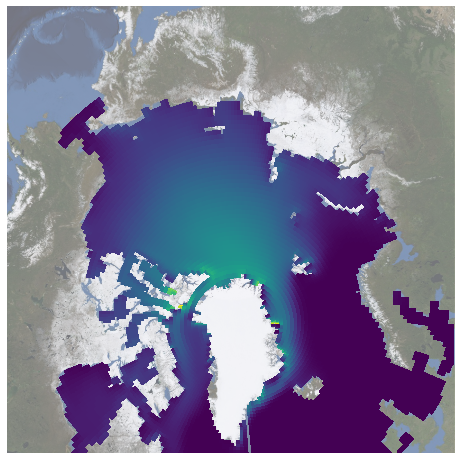

In [69]:
lat_ts=90.0
lat_0=90.0
lon_0=-45.0
sgn=1
width=7000000.
height=7000000.0
map = Basemap(width=width,height=height,resolution='h',\
            projection='stere',lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)
map.bluemarble(alpha=0.5) 
x, y = map(lon,lat)
map.pcolormesh(x, y, mean_snow_depth, cmap=cmaps.viridis)
plt.show()

<div class="alert alert-warning">
<h3>Using a similar method, we can look at the average snow depth over time.</h3>
</div>

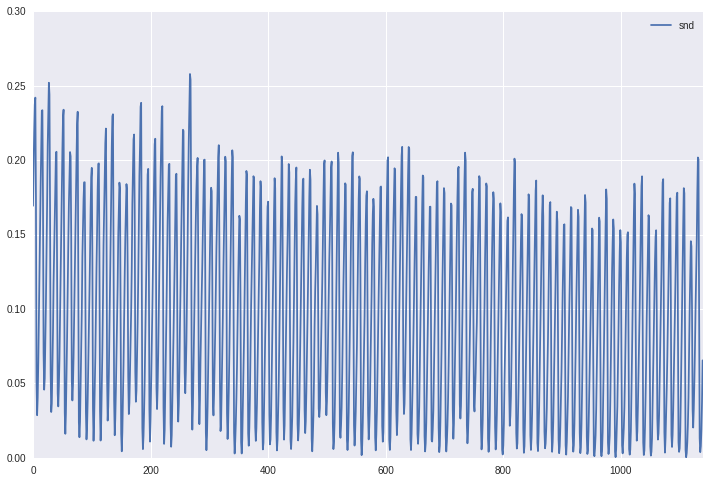

In [54]:
pd.DataFrame(snow_depth.mean(axis=3).mean(axis=2).reshape([95*12]), columns=["snd"]).plot()